In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout, Flatten, Input, Activation, Add
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop

In [ ]:
Dir = "/content/drive/MyDrive/UTKFace/UTKFace"

In [ ]:
import os
files = os.listdir(Dir)
print(files)

['22_1_3_20170104222547654.jpg.chip.jpg', '22_1_3_20170104222853135.jpg.chip.jpg', '22_1_3_20170104223125535.jpg.chip.jpg', '22_1_3_20170104222607551.jpg.chip.jpg', '22_1_3_20170104231709097.jpg.chip.jpg', '22_1_3_20170104223452679.jpg.chip.jpg', '22_1_3_20170104222612607.jpg.chip.jpg', '22_1_3_20170104231706746.jpg.chip.jpg', '22_1_3_20170104232454786.jpg.chip.jpg', '22_1_3_20170104222857952.jpg.chip.jpg', '22_1_3_20170104232054915.jpg.chip.jpg', '22_1_3_20170104223113527.jpg.chip.jpg', '22_1_3_20170104222830398.jpg.chip.jpg', '22_1_3_20170104231720114.jpg.chip.jpg', '22_1_3_20170104231657849.jpg.chip.jpg', '22_1_3_20170104232021658.jpg.chip.jpg', '22_1_3_20170104231655336.jpg.chip.jpg', '22_1_3_20170104231710175.jpg.chip.jpg', '22_1_3_20170104223821199.jpg.chip.jpg', '22_1_3_20170104222553543.jpg.chip.jpg', '22_1_3_20170104232458346.jpg.chip.jpg', '22_1_3_20170104222220913.jpg.chip.jpg', '22_1_3_20170109131950179.jpg.chip.jpg', '22_1_3_20170105002128188.jpg.chip.jpg', '22_1_3_2017010

In [ ]:
ages = []
genders = []
images = []

for fille in files:
  # Extract age and gender from the file name
  age=int(fille.split('_')[0])
  gender=int(fille.split('_')[1])
  ages.append(age)
  genders.append(gender)
  total=Dir+'/'+fille
  lod_image = cv2.imread(total)

  img_1 = cv2.cvtColor(lod_image, cv2.COLOR_BGR2RGB)
  img_2 = cv2.resize(img_1,(48,48))
  images.append(img_2)


# ages = [int(flie.split('_')[0]) for flie in files]
# genders = [int(flie.split('_')[1]) for flie in files]
# images = [Dir+'/'+flie for flie in files]

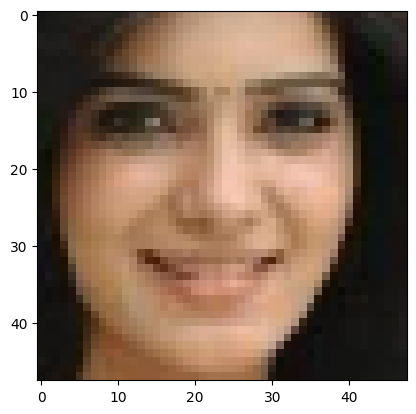

In [ ]:
plt.imshow(images[2])

In [ ]:
print(ages[2])

22


In [ ]:
print(genders[2])

1


In [ ]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [ ]:
print(images_f[0])

[[[224 216 178]
  [222 209 175]
  [208 189 159]
  ...
  [ 16   0   2]
  [ 10   1   0]
  [  9   3   0]]

 [[220 212 174]
  [217 204 170]
  [200 181 151]
  ...
  [ 19   1   0]
  [ 13   3   0]
  [ 14   5   0]]

 [[218 210 172]
  [208 194 160]
  [169 150 119]
  ...
  [ 28   6   0]
  [ 23   5   1]
  [ 22   7   2]]

 ...

 [[231 216 187]
  [216 199 171]
  [190 170 143]
  ...
  [158  94  59]
  [160  96  61]
  [160  96  61]]

 [[229 213 187]
  [205 188 162]
  [168 151 125]
  ...
  [160  96  61]
  [162  98  62]
  [164 100  64]]

 [[219 204 178]
  [188 173 147]
  [146 131 104]
  ...
  [162  98  63]
  [165 101  65]
  [167 103  67]]]


In [ ]:
np.save(Dir+'image.npy', images_f)
np.save(Dir+'ages.npy', ages_f)
np.save(Dir+'gender.npy', genders_f)

# Finding No of Male and Female

In [ ]:
values, counts = np.unique(genders_f, return_counts = True)
print(counts)

[2100 2515]


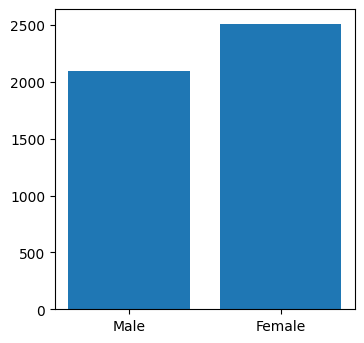

In [ ]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_axes([0,0,1,1])
Genders = ['Male', 'Female']
valu = [2100, 2515]
ax.bar(Genders, valu)
plt.show()

In [ ]:
values, counts = np.unique(ages_f, return_counts = True)
print(counts)

[1123  156   65  130   81  157  177  247  158  262   98  284  346  395
  436  468   11    2    1    5    5    1    3    4]


In [ ]:
val = values.tolist()
cnt = counts.tolist()

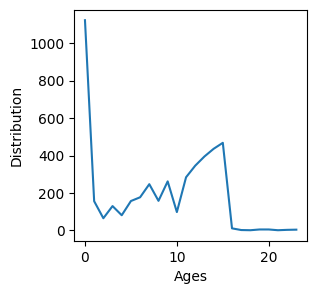

In [ ]:
fig = plt.figure(figsize=(3,3))
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [ ]:
labels = []
i=0
while i < len(ages):
  label = []
  label.append(ages[i])
  label.append(genders[i])
  labels.append(label)
  i = i+1

In [ ]:
print(labels)

[[22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [22, 1], [23, 0], [23, 0], [22, 1], [22, 1], [22, 1], [22, 1], [23, 0], [23, 0], [23, 0], [22, 1], [23, 0], [22, 1], [22, 1], [23, 0], [23, 0], [23, 0], [22, 1], [23, 0], [23, 0], [23, 0], [23, 0], [23, 0], [23, 0], 

In [ ]:
images_f_2 = images_f/225
images_f_2.shape

(4615, 48, 48, 3)

In [ ]:
labels_f=np.array(labels)

# Splitting The Dataset into test and train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(images_f_2,labels_f,test_size=0.25)

In [ ]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [ ]:
def Convolution(input_tensor,filters):
  x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
  x=Dropout(0.1)(x)
  x=Activation('relu')(x)
  return x

In [ ]:
def model(input_shape):
  inputs=Input((input_shape))
  conv_1=Convolution(inputs,32)
  maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
  conv_2=Convolution(maxp_1,64)
  maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
  conv_3=Convolution(maxp_2,128)
  maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
  conv_4=Convolution(maxp_3,256)
  maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
  flatten= Flatten()(maxp_4)
  dense_1=Dense(64,activation='relu')(flatten)
  dense_2=Dense(64,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  drop_2=Dropout(0.2)(dense_2)
  output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
  output_2=Dense(1,activation='relu',name='age_out')(drop_2)
  model=Model(inputs=[inputs],outputs=[output_1,output_2])
  model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
  return model

In [ ]:
Model = model((48,48,3))

In [ ]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
mod_file = 'Age_gen_Detecton.h5'
checkpoint = ModelCheckpoint(mod_file, monitor = 'val_loss', verbose=1, save_best_only = True, save_weights_only = False, mode = 'auto', save_freq='epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss', restore_best_weights='True')
callback_list = [checkpoint, Early_stop]

In [ ]:
History = Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250
55/55 [==============================] - ETA: 0s - loss: 9.8212 - sex_out_loss: 0.7347 - age_out_loss: 8.8519 - sex_out_accuracy: 0.5192 - age_out_accuracy: 0.2378
Epoch 1: val_loss improved from inf to 8.64808, saving model to Age_gen_Detecton.h5
55/55 [==============================] - 11s 39ms/step - loss: 9.8212 - sex_out_loss: 0.7347 - age_out_loss: 8.8519 - sex_out_accuracy: 0.5192 - age_out_accuracy: 0.2378 - val_loss: 8.6481 - val_sex_out_loss: 0.6870 - val_age_out_loss: 7.7609 - val_sex_out_accuracy: 0.5338 - val_age_out_accuracy: 0.2444
Epoch 2/250
 6/55 [==>...........................] - ETA: 0s - loss: 7.3282 - sex_out_loss: 0.6776 - age_out_loss: 6.4516 - sex_out_accuracy: 0.5677 - age_out_accuracy: 0.2109

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


51/55 [==========================>...] - ETA: 0s - loss: 7.3184 - sex_out_loss: 0.6670 - age_out_loss: 6.4585 - sex_out_accuracy: 0.5778 - age_out_accuracy: 0.2381
Epoch 2: val_loss did not improve from 8.64808
55/55 [==============================] - 1s 16ms/step - loss: 7.3290 - sex_out_loss: 0.6674 - age_out_loss: 6.4690 - sex_out_accuracy: 0.5764 - age_out_accuracy: 0.2430 - val_loss: 9.2475 - val_sex_out_loss: 0.6586 - val_age_out_loss: 8.4009 - val_sex_out_accuracy: 0.6412 - val_age_out_accuracy: 0.2348
Epoch 3/250
55/55 [==============================] - ETA: 0s - loss: 6.3172 - sex_out_loss: 0.6521 - age_out_loss: 5.4759 - sex_out_accuracy: 0.6016 - age_out_accuracy: 0.2300
Epoch 3: val_loss improved from 8.64808 to 6.67730, saving model to Age_gen_Detecton.h5
55/55 [==============================] - 1s 15ms/step - loss: 6.3172 - sex_out_loss: 0.6521 - age_out_loss: 5.4759 - sex_out_accuracy: 0.6016 - age_out_accuracy: 0.2300 - val_loss: 6.6773 - val_sex_out_loss: 0.6395 - val_

In [ ]:
Model.evaluate(X_test,Y_test_2)

37/37 [==============================] - 0s 4ms/step - loss: 3.9769 - sex_out_loss: 0.4069 - age_out_loss: 3.3150 - sex_out_accuracy: 0.8059 - age_out_accuracy: 0.2444


[3.976860284805298,
 0.40689924359321594,
 3.3150248527526855,
 0.8058925271034241,
 0.24436742067337036]

In [ ]:
pred = Model.predict(X_test)

37/37 [==============================] - 0s 2ms/step


In [ ]:
pred[1]

array([[ 1.1630961],
       [14.838941 ],
       [19.500828 ],
       ...,
       [17.55251  ],
       [17.839355 ],
       [17.664848 ]], dtype=float32)

# plotting Loss

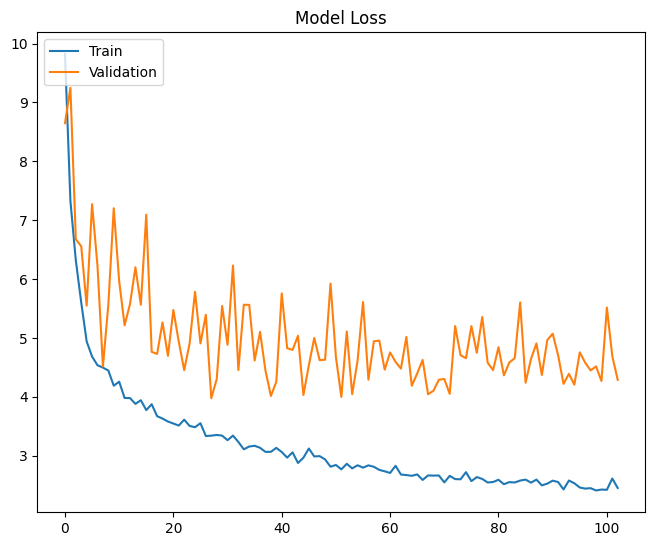

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

# Ploting Gender Accuracy

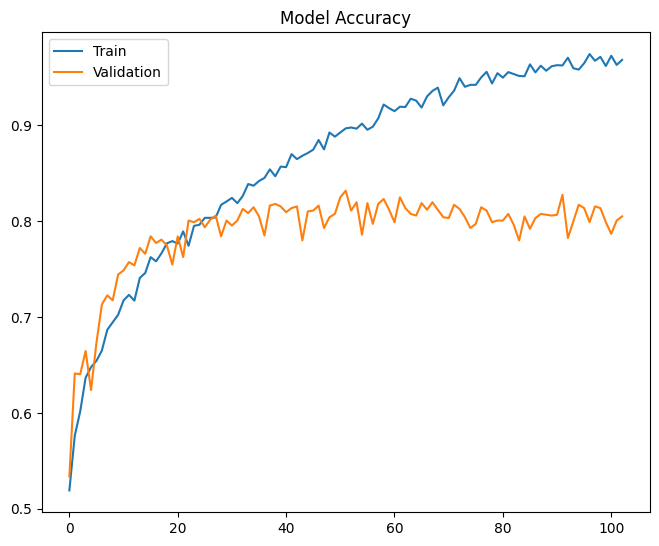

In [ ]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

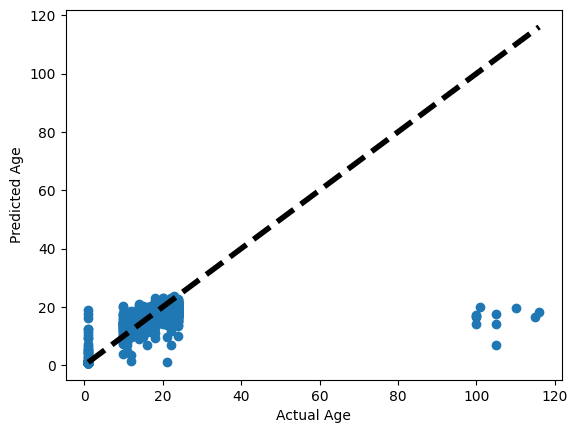

In [ ]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [ ]:
i=0
Pred_l=[]
while(i<len(pred[0])):
  Pred_l.append(int(np.round(pred[0][i])))
  i=i+1

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
report=classification_report(Y_test_2[0],Pred_l)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       546
           1       0.83      0.80      0.81       608

    accuracy                           0.81      1154
   macro avg       0.81      0.81      0.81      1154
weighted avg       0.81      0.81      0.81      1154



# Heatmap of the Model (Gender)

In [ ]:
results=confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

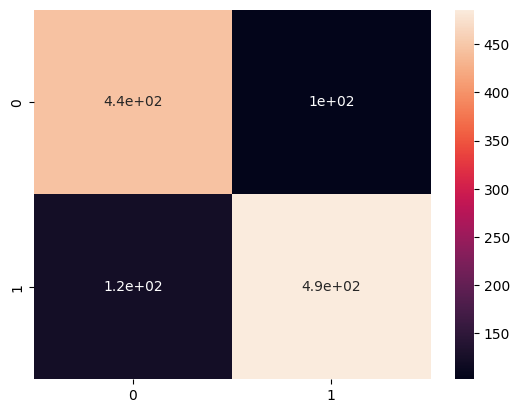

In [ ]:
import seaborn as sns
sns.heatmap(results,annot=True)

# Testing The Images

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

1/1 [==============================] - 0s 19ms/step
Predicted Age is 20
Predicted Gender is Female


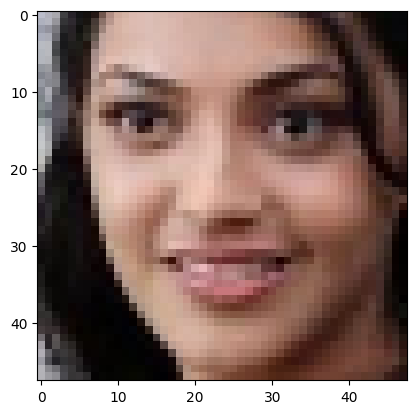

In [ ]:
test_image(20,images_f,images_f_2,Model)